In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('compounds_data.xlsx')

In [3]:
df

,RackettZra,class,CAS_Number,UNIFACStructure,IDNumber,Formula,CriticalTemperature,CriticalPressure,CriticalVolume,Acentricity,...,AntoineCoeffsA,AntoineCoeffsB,AntoineCoeffsC,AntoineCoeffsD,AntoineCoeffsE,AntoineCoeffsF,AntoineCoeffsG,AntoineCoeffsH,name,C
0,0.28927,P,74-82-8,CH4,1.0,CH4,-82.450995,4640.680176,0.099000,0.011498,...,31.3500,-1307.52,0.0,-3.26134,2.941800e-05,2.0,0.0,0.0,Methane,1.0
1,0.28085,P,74-84-0,(CH3)2,2.0,C2H6,32.278009,4883.850098,0.148000,0.098600,...,44.0103,-2568.82,0.0,-4.97635,1.464470e-05,2.0,0.0,0.0,Ethane,2.0
2,0.27657,P,74-98-6,(CH3)2 CH2,3.0,C3H8,96.748010,4256.660156,0.200000,0.152400,...,52.3785,-3490.55,0.0,-6.10875,1.118690e-05,2.0,0.0,0.0,Propane,3.0
3,0.27493,P,75-28-5,(CH3)3 CH,4.0,C4H10,134.946008,3647.620117,0.263000,0.184790,...,58.7845,-4136.68,0.0,-7.01666,1.036620e-05,2.0,0.0,0.0,i-Butane,4.0
4,0.27292,P,106-97-8,(CH3)2 (CH2)2,5.0,C4H10,152.049005,3796.620117,0.254990,0.201000,...,66.9450,-4604.09,0.0,-8.25491,1.157060e-05,2.0,0.0,0.0,n-Butane,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,0.25762,Ni,111-68-2,(CH2)5 CH3 CH2NH2,3348.0,C7H17N,333.850000,2850.000000,0.470999,0.511255,...,126.8310,-10314.00,0.0,-16.54000,1.115880e-05,2.0,0.0,0.0,nC7Amine,7.0
1804,0.25486,Ni,578-54-1,CH3 (ACH)4 ACCH2 ACNH2,3356.0,C8H11N,430.850000,3740.000000,0.398999,0.463124,...,67.8692,-9204.70,0.0,-7.15719,2.958660e-18,6.0,0.0,0.0,oEAniline,8.0
1805,0.25581,Ni,108-75-8,(CH3)3 C5H3N,3357.0,C8H11N,379.850000,3330.000000,0.416999,0.375853,...,86.3932,-8241.40,0.0,-10.99400,8.567900e-03,1.0,0.0,0.0,246MPyridine,8.0
1806,0.25545,Ni,111-86-4,(CH2)6 CH3 CH2NH2,3374.0,C8H19N,353.850000,2580.000000,0.523998,0.567955,...,68.3292,-8450.29,0.0,-7.37849,8.688360e-18,6.0,0.0,0.0,nOctylAmine,8.0


In [4]:
pna = df[df['class'].isin(['P', 'N', 'A'])]

In [12]:
pna_by_c = pna[['MolecularWeight', 'NormalBoilingPoint', 'StdLiquidDensity', 'C', 'class']].groupby(by=['C', 'class']).mean()

In [13]:
pna_by_c

MolecularWeight  NormalBoilingPoint  StdLiquidDensity
C    class                                                       
1.0  P            16.042900         -161.525000        299.394012
2.0  P            30.069901          -88.599997        355.683014
3.0  N            42.080300          -32.778388        507.402801
     P            44.097000          -42.101996        506.678009
4.0  N            56.109233            8.583300        662.207461
...                     ...                 ...               ...
28.0 P           394.739014          431.610010        808.359009
29.0 P           408.769012          440.779016        810.341003
30.0 P           422.810501          448.284509        810.884003
32.0 P           450.876007          465.699976        815.906006
36.0 P           506.984009          497.000024        817.471985

[77 rows x 3 columns]

In [31]:
p_by_c = pna[pna['class'] == 'P'].groupby(by='C').mean(numeric_only=True)
n_by_c = pna[pna['class'] == 'N'].groupby(by='C').mean(numeric_only=True)
a_by_c = pna[pna['class'] == 'A'].groupby(by='C').mean(numeric_only=True)

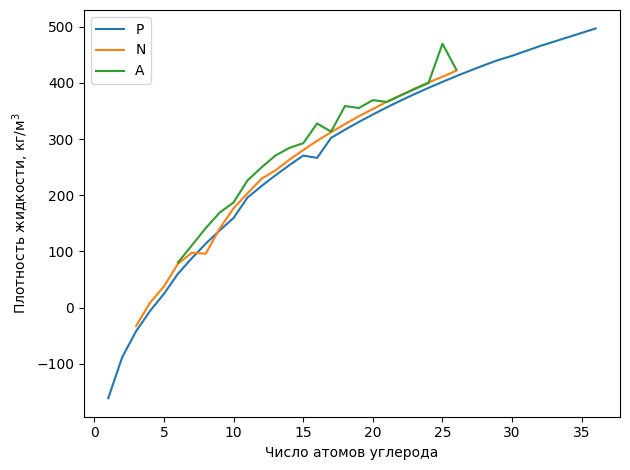

In [36]:
plt.plot(p_by_c.NormalBoilingPoint, label='P')
plt.plot(n_by_c.NormalBoilingPoint, label='N')
plt.plot(a_by_c.NormalBoilingPoint, label='A')
plt.xlabel('Число атомов углерода')
plt.ylabel('Плотность жидкости, кг/м$^3$')
plt.legend()
plt.tight_layout()

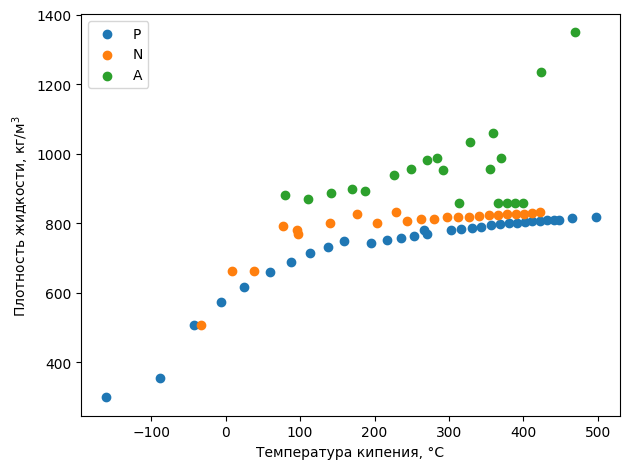

In [37]:
plt.scatter(p_by_c.NormalBoilingPoint, p_by_c.StdLiquidDensity, label='P')
plt.scatter(n_by_c.NormalBoilingPoint, n_by_c.StdLiquidDensity, label='N')
plt.scatter(a_by_c.NormalBoilingPoint, a_by_c.StdLiquidDensity, label='A')
plt.xlabel('Температура кипения, °С')
plt.ylabel('Плотность жидкости, кг/м$^3$')
plt.legend()
plt.tight_layout()